In [1]:
# CRISP - DM 6 pontja
# 1. Üzleti helyzet megértése - Business understanding
# 2. Adatok megértése         - Data understanding
# 3. Adatok előkészítése      - Data preparation
# 4. Modellezés               - Modelling
# 5. Kiértékelés              - Evaluation
# 6. Deployment               - Deployment

#      .--..--..--..--..--..--.
#    .' \  (`._   (_)     _   \
#  .'    |  '._)         (_)  |
#  \ _.')\      .----..---.   /
#  |(_.'  |    /    .-\-.  \  |
#  \     0|    |   ( O| O) | o|
#   |  _  |  .--.____.'._.-.  |
#   \ (_) | o         -` .-`  |
#    |    \   |`-._ _ _ _ _\ /
#    \    |   |  `. |_||_|   |
#    | o  |    \_      \     |     -.   .-.
#    |.-.  \     `--..-'   O |     `.`-' .'
#  _.'  .' |     `-.-'      /-.__   ' .-'
#.' `-.` '.|='=.='=.='=.='=|._/_ `-'.'
#`-._  `.  |________/\_____|    `-.'
#   .'   ).| '=' '='\/ '=' |
#   `._.`  '---------------'
#           //___\   //___\
#             ||       ||
#    LGB      ||_.-.   ||_.-.
#            (_.--__) (_.--__)

In [101]:
'''Importok'''
import pandas as pd
import numpy as np
from sklearn import *

%matplotlib inline

# Data undersanding

In [108]:
df = pd.read_csv("power_train.csv")
#df.dtypes
#df.head()

#Ahhoz hogy a scikitlearn szeressen minket két dolog kell:
#    Minden változó legyen numerikus
#    Ne legyenek hiányzó adatok

#1. önálló feladat -> excel bejuttatása

xl_file = pd.ExcelFile('weather.xlsx')
dfw = xl_file.parse(xl_file.sheet_names[0])

#df.describe()
pd.isnull(df).sum()
# winter 11 hiányzó értéket tartalmaz
# a célváltozó hiányzik 3szor helyen

#FrontFill - az utolsó nem null értéket teszi oda ffill()

Date               0
day_type           0
school_holiday     0
winter            11
volume             3
dtype: int64

# Data preparation

In [109]:
# A dátum vegye fel a dátumformátumot
df["Date"] = pd.to_datetime(df.Date)
dfw["Date"] = pd.to_datetime(dfw.Date)

df.index = df.Date
dfw.index = dfw.Date

df.resample('1M')

#Kitöltjük a wintert
df["winter"] = df["winter"].ffill()

#Kiszedjük, ahol üres a célváltozó
df = df[df.volume.notnull()]

#Ellenőrizzük hogy jó-e amit csináltunk
pd.isnull(df).sum()


# Generate date related attributes
df['month'] = df.index.map(lambda x: x.month)
df['dow'] = df.index.map(lambda x: x.dayofweek)
df['doy'] = df.index.map(lambda x: x.dayofyear)
df['day'] = df.index.map(lambda x: x.day)
df['woy'] = df.index.map(lambda x: x.weekofyear)
df['yr'] = df.index.map(lambda x: x.year)


del df['day_type']
del df['Date']

#Vágási pont meghatározása
start = '2013-01-01'
train = df[df.index < start]
val = df[start:]

y = val.volume

# Modelling

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


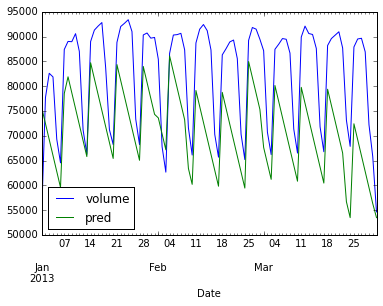

In [110]:
from sklearn import linear_model

#Legegyszerűbb regresszió a lineáris regresszió 
regr = linear_model.LinearRegression()
regr = regr.fit(train[train.columns-['volume']], train.volume)

#Ki kell venni a volume-ot különben arra tanul rá
p = regr.predict(val[val.columns-['volume']])

val["pred"] = p

val[["volume", "pred"]].plot()

# Evaluation

In [112]:
from sklearn import metrics

#MSE
metrics.mean_squared_error(y,p)

# Normalized Mean Absolute Error - 10-11% körlüli hiba
mape  = lambda x, y: np.abs((y-x)/y).mean()
mape(y,p)*100



16.638634650878075